# 21M.387 Fundamentals of Music Processing
## Problem Set 1: Music Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Exercise 1

Below is a video of Lang Lang, world famous concert pianist, playing Frederic Chopin's "Minute Waltz".

The sheet music is [here](data/chopin_waltz_op64_1.pdf).

Questions:
1. How long is Lang Lang's rendition of this piece? (approximately, in seconds)
1. How many measures are there in the score? (repeats are not double counted)
1. How many measures are actually played in this recording? (repeated bars are counted here)
1. What is the average tempo of this recording? Give your answer in BPM where a beat is an entire measure. 
1. Based on this average tempo, how long (in milliseconds) does an eighth-note last?
1. In the actual recording, Lang Lang's tempo fluctuates a lot. What is (approximately) his maximum tempo and his minimum tempo?


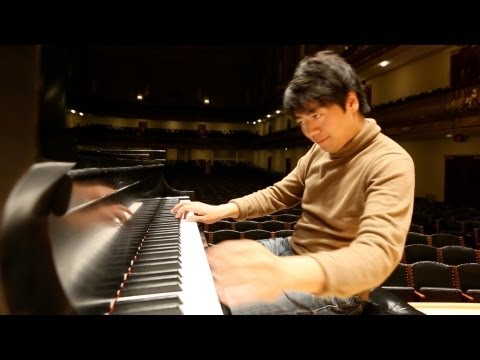

In [2]:
ipd.YouTubeVideo('hKILwVH_MdM')

Answers:

1. 100 seconds.
2. 125 measures.
3. 140 measures.
4. Assuming one beat per measure, we have 140 measures in 100 secs -> $140/100*60 = 84$ average BPM.
5. 84 BPM and one beat per measure -> $60 / 84 = 0.71$ secs per measure. With 6 eight notes per measure -> $0.71 * 1000 / 6 = 118.33$ms
6. Max of 160 BPM, min of 40 BPM (assuming one beat per measure).

## Exercise 2

Using the same score as in Exercise 1, write out what the Standard MIDI File (SMF) representation would look like for measure 5 of the Chopin Waltz (this is the bar where the left hand first comes in). 

- Assume a "ticks per quarter" value of 120.
- Remember that each midi event's tick value is a delta tick from the previous event.
- Assign channel 1 to the left hand and channel 2 to the right hand.
- Use note velocity = 60 for the beginning, but note that there is a slight crescendo at the end of the bar.
- Create your answer as a python array of events, where each event is a tuple of the format:
    `(<delta-tick>, <event-type>, <channel>, <pitch>, <velocity>)`
- It should look a bit like [_Fig 1.13b_](data/midi_table.png) of the text.

The first event is created for you as an example.

In [3]:
chopin_sequence = [
    (0,  'note_on',  2, 67,  60),  # t=0
    (0,  'note_on',  1, 49,  60),  # t=0
    (60, 'note_off', 2, 67,   0),  # t=60
    (0,  'note_on',  2, 68,  60),  # t=60
    (60, 'note_off', 1, 49,   0),  # t=120
    (0,  'note_off', 2, 68,   0),  # t=120
    (0,  'note_on',  1, 54,  60),  # t=120
    (0,  'note_on',  1, 61,  60),  # t=120
    (0,  'note_on',  1, 65,  60),  # t=120
    (0,  'note_on',  2, 72,  60),  # t=120
    (60, 'note_off', 2, 72,   0),  # t=180
    (0,  'note_on',  2, 70,  60),  # t=180
    (60, 'note_off', 2, 70,   0),  # t=240
    (0,  'note_off', 1, 54,   0),  # t=240
    (0,  'note_off', 1, 61,   0),  # t=240
    (0,  'note_off', 1, 65,   0),  # t=240
    (0,  'note_on',  2, 67,  90),  # t=240
    (0,  'note_on',  1, 54,  60),  # t=240
    (0,  'note_on',  1, 61,  60),  # t=240
    (0,  'note_on',  1, 65,  60),  # t=240
    (60, 'note_off', 2, 67,   0),  # t=300
    (0,  'note_on',  2, 68, 120),  # t=300
    (60, 'note_off', 2, 68,   0),  # t=360
    (0,  'note_off', 1, 54,   0),  # t=360
    (0,  'note_off', 1, 61,   0),  # t=360
    (0,  'note_off', 1, 65,   0)   # t=360
]

## Exercise 3

1. Write the function `pitch_to_freq` that returns the frequency (in Hertz) of a given MIDI pitch, assuming equal tempered tuning. Test it with `p = 69` (answer should be 440.0) and a few other values.

1. Write the function `freq_to_pitch` that returns the midi-pitch from any frequency (also with equal tempered tuning). The returned midi-pitch value should be a floating-point value. Do not round it to the nearest integer.

In [4]:
def pitch_to_freq(p):
    assert(p >= 0 and p <= 127)
    freq_A4 = 440
    return 2**(((p*1.0) - 69.0)/12.0) * freq_A4

# write some testing code here...
assert(pitch_to_freq(69) == 440.0)
assert(pitch_to_freq(0) == 8.175798915643707)
assert(pitch_to_freq(127) == 12543.853951415975)

def freq_to_pitch(f):
    assert(f >= pitch_to_freq(0) and f <= pitch_to_freq(127))
    freq_A4 = 440
    return 12*np.log2(f/(freq_A4*1.0)) + 69

# write some testing code here...
assert(freq_to_pitch(440) == 69)
assert(freq_to_pitch(439) == 68.96060899212839)
assert(freq_to_pitch(8.175798915643707) == 0.0)
assert(freq_to_pitch(12543.853951415975) == 127.0)

## Exercise 4

1. Write the function `pitch_to_spn()` that takes as input an integer midi pitch and returns its _Scientific Pitch Notation_ name as a string. For example, `69` should return the string `"A4"`. In the case of enharmonics, you can choose either the sharp or flat version. For example you can return `"Eb4"` or `"D#4"`.

1. Write the function `g_major_scale()` that returns a list of notes of the G
major scale, starting at G3 and ending at G4. Each note should be the tuple `(<SPN-name>, <note-frequency>)` 

In [5]:
import math  # math.ceil

c = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

def midi_major_scale(p):
    assert(p >= 0 and p <= 127 - len(c))
    # W W H W W W H
    maj_int = [2, 2, 1, 2, 2, 2, 1]
    return np.cumsum([p] + maj_int)

def pitch_to_spn(s) :
    octave = math.floor(s / (len(c) * 1.0)) -1
    c_idx = s % len(c)
    return c[c_idx] + str(octave)

def g_major_scale() :
    # G3 = 55 midi
    s = midi_major_scale(55)
    return [(pitch_to_spn(x),pitch_to_freq(x)) for x in s]

for n in g_major_scale():
    print(n)

# tests
assert(pitch_to_spn(0) == 'C-1')
assert(pitch_to_spn(21) == 'A0')
assert(pitch_to_spn(37) == 'C#2')
assert(pitch_to_spn(60) == 'C4')
assert(pitch_to_spn(69) == 'A4')
assert(pitch_to_spn(87) == 'D#6')
assert(pitch_to_spn(108) == 'C8')
assert(pitch_to_spn(127) == 'G9')

('G3', 195.99771799087463)
('A3', 220.0)
('B3', 246.94165062806206)
('C4', 261.6255653005986)
('D4', 293.6647679174076)
('E4', 329.6275569128699)
('F#4', 369.9944227116344)
('G4', 391.99543598174927)


## Exercise 5

Write the function `calc_harmonic_intontations` that returns a list of the first N harmonics of a given midi pitch. For each harmonic, it should calculate the tuple `(<f>, <nen>, <delta>)` where:
- `<f>` is the harmonic's frequency
- `<nen>` is the nearest equal-tempered pitch for that frequency, represented in SPN
- `<delta>` is the difference in from `<nen>`'s pitch to `<f>`'s pitch, measured in cents (there are 100 cents in one semitone).

By looking at these data, you can observe when an equal-tempered note might sound a bit out of tune (slightly sharp or flat) when played against another note that has strong harmonic overtones.

In [6]:
# freq -> spn table
def gen_freq_table():
    f_A4 = 440
    c = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    r = 2**(1.0/len(c)*1.0)  # equal temperament semitone ratio
    n_octaves = 12  # C-1 -> C11
    ac = 3  # number of semitones from A to C

    lower = -len(c)*(n_octaves/2)+ac  # C-1
    upper = len(c)*(n_octaves/2)+ac   # C11
    freqs = [f_A4 * (r**i) for i in np.arange(lower, upper+1)]                                               
             
    freqs_to_spn = {}
    for f in freqs:
        f_idx = min(range(len(freqs)), key=lambda i: abs(freqs[i]-f))
        octave = math.ceil((f_idx+1) / (len(c) * 1.0)) - 2
        c_idx = f_idx % len(c)
        freqs_to_spn[f] = c[c_idx] + str(octave)

    return freqs_to_spn


f_table = gen_freq_table()

def freq_to_closest_spn(f) :
    return f_table.get(f, f_table[min(f_table.keys(), key=lambda k: abs(k-f))])


def calc_harmonic_intontations(pitch, num_h) :
    freqs = pitch_to_freq(pitch) * np.arange(1, num_h + 1)
    cent = 2**(1.0/len(c)*100.0)
    
    res = []
    for f in freqs:
        nen = min(f_table.keys(), key=lambda k: abs(k-f))
        spn = f_table[nen]
        res.append((f, spn, (nen-f)/cent))

    return res


for h in calc_harmonic_intontations(48, 15):
    print(h)


(130.8127826502993, 'C3', -3.5247383944185826e-16)
(261.6255653005986, 'C4', -3.5247383944185826e-16)
(392.43834795089793, 'G4', -0.0013732010268669966)
(523.2511306011972, 'C5', 3.5247383944185826e-16)
(654.0639132514966, 'E5', 0.016094760258851534)
(784.8766959017959, 'G5', -0.0027464020537325833)
(915.6894785520951, 'A#5', 0.05158447132173934)
(1046.5022612023945, 'C6', 2.1148430366511495e-15)
(1177.3150438526939, 'D6', -0.008234556713656844)
(1308.1278265029932, 'E6', 0.032189520517705184)
(1438.9406091532924, 'F#6', 0.12723106767493092)
(1569.7533918035917, 'G6', -0.005492804107463052)
(1700.566174453891, 'G#6', -0.12199234173179986)
(1831.3789571041902, 'A#6', 0.10316894264348221)
(1962.1917397544896, 'B6', 0.04136378125861212)


## Exercise 6

How much space, measured in bytes, does it take to store a WAVE file (just the data part, ignoring the WAVE header) for the following cases:

1. A one minute CD quality song (stereo, 16 bits per channel, $F_s = 44100$)
1. 20 seconds of a low quality voice recording (mono, 8 bits per channel, $F_s = 8000$)

Show your actual calculations in python below.

In [7]:
# you can type the python code which prints the answers

def get_bytes(bits, fs, secs, chan):
    n_bytes = bits / 8
    return int(n_bytes * fs * secs * chan)

print(f'1. {get_bytes(16, 44100, 60, 2)} bytes') 
print(f'2. {get_bytes(8, 8000, 20, 1)} bytes') 

1. 10584000 bytes
2. 160000 bytes


## Exercise 7

Since the decibel scale is logarithmic, it theoretically cannot represent absolute silence (ie, amplitude 0), since $A = 20 \log_{10}(0)$ is not a number ($- \infty$). However, in practice, with audio signals encoded as digital numbers with finite precision, it is possible to guarantee $A=0$ using attenuation in decibels. 

If an audio signal is represented using CD-quality audio (16 bits of precision), what is the smallest amount of signal attenuation, in dB, that guarantees actual silence, where the signal's attenuated values all become $0$? Explain your reasoning.

What attenuation value, in dB, would be needed for 24-bit precision numbers?

Answer:

Using **16 bits of precision** and two's complement, the maximum range of amplitude signal is $-2^{15}$ to $2^{15}-1$. This translates to a maximum possible absolute dB signal of $20 \log_{10}((2^{15}-1) - (-2^{15}))$ ~= $96.33$dB, so a **signal attenuation of $-96.33$dB**. This corresponds to amplitude of $10^{(-96.33/20)}$ ~= $0.000015$.

Using **24 bits of precision** and two's complement, the maximum range of amplitude signal is $-2^{23}$ to $2^{23}-1$. This translates to a maximum possible absolute dB signal of $20 \log_{10}((2^{23}-1) - (-2^{23}))$ ~= $144.50$dB, so a **signal attenuation of $-144.50$dB** would be necessary. This corresponds to amplitude of $10^{(-144.50/20)}$ ~= $0.00000006$.


## Exercise 8

Write the function `make_tone` that synthesizes a tone using additive synthesis, sampled at 44,100 Hz.

The inputs are function should be:
- `f0`: the fundamental frequency (in Hz)
- `dur`: the duration of the produced tone, in seconds
- `partials`: a list of partials where each partial is a tuple of two numbers `(p, a)`:
  - `p`: a partial number (ie, 1 for the fundamental, 2 for the 2nd harmonic, etc...)
  - `a`: an amplitude for that partial ($0 < a \le 1$)

Your code should create the appropriate sinusoid wave for each partial in the list, add them all together, and return the result as a `numpy` array that you can play with `ipd.Audio()`.

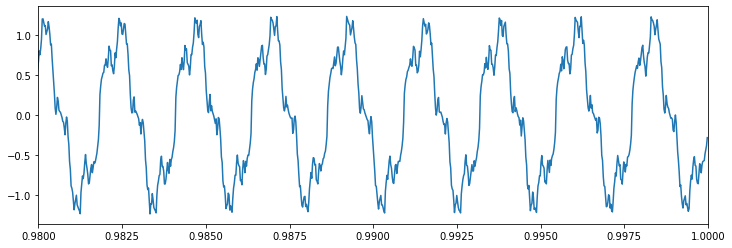

In [8]:
FS = 44100

def make_sine_tone(amp, freq, dur, fs):
    # n_secs = n_samples / fs -> n_samples = fs * n_secs
    n_samples = int(fs * dur)
    n = np.arange(0, n_samples)
    return amp * np.sin(2 * np.pi * freq * n / fs)

def make_tone(f0, dur, partials):
    n_samples = int(FS * dur)
    
    x = np.zeros(n_samples)
    for p in partials:
        x += make_sine_tone(p[1], f0 * p[0], dur, FS)
    
    # optionally normalize between -1 and 1
    #x /= np.max(np.abs(x),axis=0)
    
    return x

# a fun fire-like tone
y = make_tone(440, 1, [(n**2, 1./n**2) for n in range(1,20)])

# plot over time
t = np.arange(len(y))
t = t / FS

plt.plot(t, y)
plt.xlim(0.98,1.0)

ipd.Audio(y, rate=FS)

For each of `partials0`, `partials1`, and `partials2` below:  

- Synthesize a 3 second tone
- Listen to the tone
- Plot the first 1000 samples of the tone
- Describe briefly what each one sounds like. 

Why does `partials2` sound different from the first two? It's also fun to run the code for `partials2` a bunch of times to hear the different versions caused by the random variable.

In [9]:
partials0 =  [(n, 1./n) for n in range(1,20)]
partials1 =  [(n*2-1, 1./(n*2-1) ) for n in range(1,10)]
partials2 =  [(n + np.random.random(), 1./(n)) for n in range(1,20)]

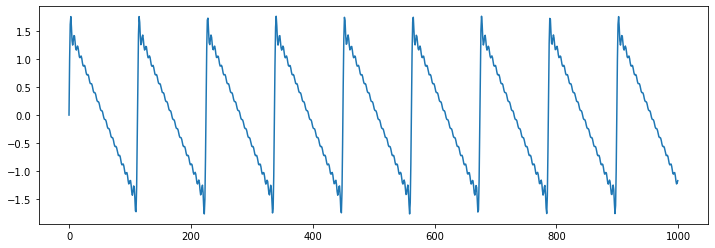

This one sounds a bit "buzzy".


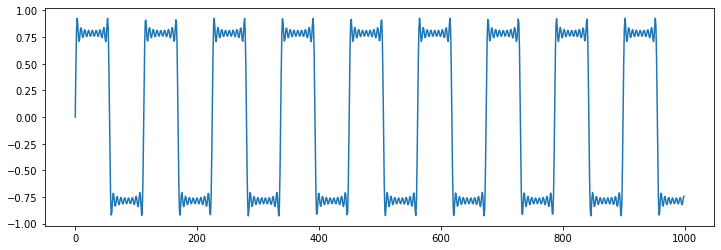

This one sounds "hollow", or more synth-like.


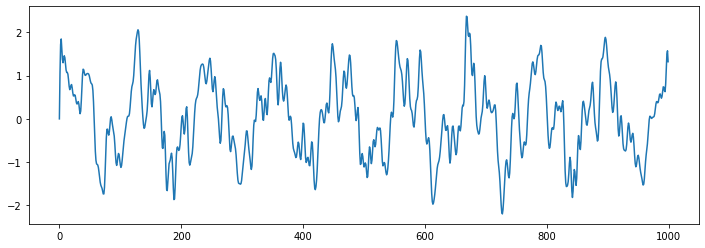

This one sounds as though it has multiple dissonant voices. A tad "fire-alarm"-y.


In [10]:
# Audio, Plots, Descriptions:
p = [('a bit "buzzy"', partials0),
     ('"hollow", or more synth-like', partials1),
     ('as though it has multiple dissonant voices. A tad "fire-alarm"-y', partials2)]
fs=44100

for i in range(len(p)):
    y = make_tone(392.43834795089793, 3, p[i][1])

    # plot over time
    t = np.arange(len(y))
    t = t / FS

    plt.plot(y[:1000])
    plt.show()

    print(f'This one sounds {p[i][0]}.')
    ipd.display(ipd.Audio(y, rate=fs))

## Exercise 9
This exercise is worth twice the points as the others.

Write the function `synthesize_midi` that synthesizes a MIDI sequence. 

The input are: 
- `sequence`: a list of MIDI events, exactly as specified in Exercise 2. 
- `partials`: a list of partials, describing the desired timbre, in the same format used by Exercise 8.

Each synthesized note should use `make_tone` above with the proper duration, multiplied by a decay envelope, similarly to what you did in lab. Remember to apply the note velocity to each note. You will also need to pick a reasonable tempo.

To test your function, use the `chopin_sequence` that you created in Exercise 2. 

The output should be a `numpy` array that you can play with `ipd.Audio()`.


In [11]:
fs = 44100

def secs_per_tick(bpm, tpqn):
    min_secs = 60
    return (min_secs * 1.0) / (bpm * tpqn * 1.0)

def make_decay_envelope(n_samples, amp):
    # original amp is reference amp for linear envelope
    db = np.linspace(0.0, -40.0, n_samples)
    return amp * 10**(db/20)

# not sure how to use velocity, so just linearly mapping to amp=[0.0,1.0]
def velocity_to_amp(v):
    return v * 1.0 / 127.0

def synthesize_midi(sequence, partials, bpm) :
    s = secs_per_tick(bpm, 120)
    
    curr_t = 0
    notes = {}
    synth = []
    for e in chopin_sequence:
        curr_t += e[0]
        f = pitch_to_freq(e[3])
        
        if e[1] == 'note_on':
            notes[f] = (curr_t, e[4])
            #print(f'{f} started at {curr_t}')
        
        if e[1] == 'note_off':
            #print(f'{f} ended at {curr_t}')
            silence_dur = notes[f][0] * s
            dur = (curr_t - notes[f][0]) * s
            #print(f'should add {silence_dur} secs of silence + {dur} secs of {f}\n')
            
            x = make_tone(f, dur, partials)
            x *= make_decay_envelope(len(x), velocity_to_amp(notes[f][1]))
            s_samples = int(silence_dur * fs)
            y = np.concatenate([np.zeros(s_samples), x])
            
            len_diff1 = max(0, len(y)-len(synth))
            len_diff2 = max(0, len(synth)-len(y))
            synth = np.pad(synth, [(0,len_diff1)], mode='constant')
            synth += np.pad(y, [(0,len_diff2)], mode='constant')
            
            # reset for the next note
            notes[f] = (curr_t, 0)
            
    return synth

Each using a different set of partials:

160 BPM


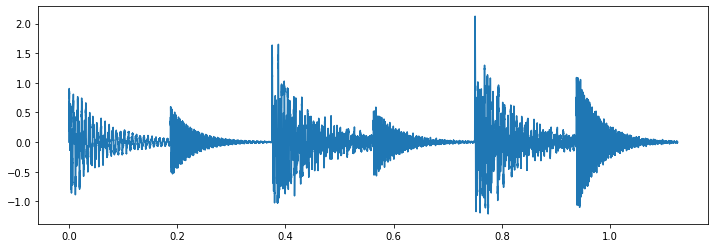

168 BPM


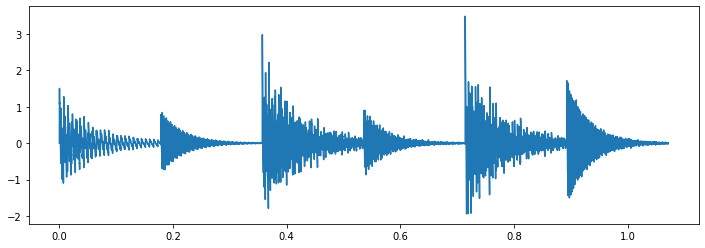

104 BPM


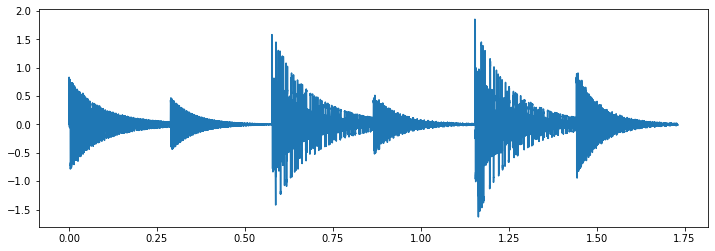

98 BPM


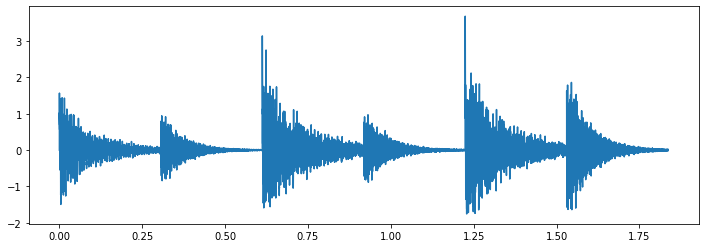

In [12]:
# test it:
partials = [
    [(n**2, 1./n**2) for n in range(1,20)],
    partials0,
    partials1,
    partials2
]

print('Each using a different set of partials:\n')
fs = 44100
for p in partials:
    bpm = np.random.randint(90,170)
    x = synthesize_midi(chopin_sequence, p, bpm)
    #print(x.shape)

    print(f'{bpm} BPM')
    
    # plot over time
    t = np.arange(len(x))
    t = t / fs
    plt.plot(t, x)
    plt.show()

    # play
    ipd.display(ipd.Audio(x, rate = fs))